# ***USO DE DISPOSITIVOS MOBILES Y***
# ***COMPORTAMIENTO DE SUS USUARIOS***

## **Integrantes**

### **Santiago Ituyan Figueroa**
### **Victor Andres Martinez Preciado**
### **Juan Estevan Viera Cano**

# **Contexto**

*Este conjunto de datos nos proporciona una vista profunda a los casos de tiroteos masivos en Estados Unidos durante el presente año 2024. El dataset contiene datos de incidentes ocurridos hasta el 20 de Octubre de 2024 provenientes del "Gun Violence Archive".*

*Capta detalles esenciales como la identificacion del incidente, la fecha, el estado, la ciudad, la cantidad de victimas (muertas y heridas) y los sospechosos involucrados. Ademas, se incluyen coordenadas geograficas para permitir el analisis espacial de las tendencias de la violencia relacionada a armas de fuego*

<center>
<img src="https://storage.googleapis.com/kaggle-datasets-images/5922722/9688271/1b5be348ab4e74955b45718b32ca4472/dataset-cover.png?t=2024-10-23-02-56-25">
</center>

# **Link del DATASET**

### *https://www.kaggle.com/datasets/whisperingkahuna/gunviolence1?resource=download*

# **Atributos de Columnas**

*  **Incident IDs:** El ID de cada incidente para identificarlos individualmente
*  **Incident Date:** La fecha de cada incidente
*  **State and City/County:** El estado y la ciudad o estado del incidente
*  **Victims Killed:** La cantidad de victimas asesinadas
*  **Victims Injured:** La cantidad de victimas lastimadas
*  **Suspects Killed:** La cantidad de sospechosos asesinados
*  **Suspects Injured:** La cantidad de sospechosos lastimados
*  **Suspects Arrested:** La cantidad de sospechosos arrestados
* **Suspects:** La cantidad de sospechosos total de cada incidente
* **Latitude - Longitude:** Las coordenadas del incidente dividido en las dos columnas de latitud y longitud
* **Coordinates_Found:** Un valor booleano donde se muestra si se encontraron coordenadas o no

In [14]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\vamp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\vamp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\vamp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\vamp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\vamp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate

In [16]:
from google.colab import drive
drive.mount('/gdrive')

ModuleNotFoundError: No module named 'google'

In [17]:
df = pd.read_csv('./Gun_violence_Dataset_US.csv')

In [18]:
df.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,NaN,47.56812,-121.89086,Yes
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,NaN,35.61390,-88.81940,Yes
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,NaN,30.44335,-91.18664,Yes
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,NaN,39.95222,-75.16218,Yes
4,3050940,"October 19, 2024",Mississippi,Lexington,24904 MS-17,3,8,0,0,0,NaN,33.11464,-90.05281,Yes


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Incident ID        427 non-null    int64  
 1   Incident Date      427 non-null    object 
 2   State              427 non-null    object 
 3   City Or County     427 non-null    object 
 4   Address            426 non-null    object 
 5   Victims Killed     427 non-null    int64  
 6   Victims Injured    427 non-null    int64  
 7   Suspects Killed    427 non-null    int64  
 8   Suspects Injured   427 non-null    int64  
 9   Suspects Arrested  427 non-null    int64  
 10  Operations         0 non-null      float64
 11  Latitude           427 non-null    float64
 12  Longitude          427 non-null    float64
 13  Coordinates_Found  427 non-null    object 
dtypes: float64(3), int64(6), object(5)
memory usage: 46.8+ KB


In [20]:
df.describe()

,Incident ID,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude
count,4.270000e+02,427.000000,427.000000,427.000000,427.000000,427.000000,0.0,427.000000,427.000000
mean,2.929432e+06,1.000000,4.437939,0.070258,0.063232,0.711944,NaN,36.941819,-88.791959
std,6.876031e+04,1.210285,2.849555,0.264896,0.271030,1.178414,NaN,4.934289,12.976850
min,2.791411e+06,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,21.449910,-166.739450
25%,2.879320e+06,0.000000,3.000000,0.000000,0.000000,0.000000,NaN,33.449545,-91.910580
50%,2.939030e+06,1.000000,4.000000,0.000000,0.000000,0.000000,NaN,37.687490,-86.811790
75%,2.982807e+06,1.000000,5.000000,0.000000,0.000000,1.000000,NaN,40.692450,-80.735325
max,3.052758e+06,8.000000,28.000000,2.000000,2.000000,7.000000,NaN,68.349440,-70.256650


In [21]:
df.dtypes

Incident ID            int64
Incident Date         object
State                 object
City Or County        object
Address               object
Victims Killed         int64
Victims Injured        int64
Suspects Killed        int64
Suspects Injured       int64
Suspects Arrested      int64
Operations           float64
Latitude             float64
Longitude            float64
Coordinates_Found     object
dtype: object

In [22]:
df1 = df.copy()

# **Limpieza de datos**

### Hacemos limpieza de datos nulos

In [23]:
df1 = df.drop(columns=['Operations'])

In [24]:
df1.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Latitude,Longitude,Coordinates_Found
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,47.56812,-121.89086,Yes
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,35.61390,-88.81940,Yes
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,30.44335,-91.18664,Yes
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,39.95222,-75.16218,Yes
4,3050940,"October 19, 2024",Mississippi,Lexington,24904 MS-17,3,8,0,0,0,33.11464,-90.05281,Yes


### quitamos la columna Coordinates_found, ya que todos los valores son el mismo tipo de dato: True

In [25]:
df1 = df1.drop(columns=['Coordinates_Found'])

In [ ]:
df1.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Latitude,Longitude
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,47.56812,-121.89086
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,35.61390,-88.81940
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,30.44335,-91.18664
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,39.95222,-75.16218
4,3050940,"October 19, 2024",Mississippi,Lexington,24904 MS-17,3,8,0,0,0,33.11464,-90.05281


In [26]:
df1 = df1.set_axis(['ID Incidente', 'Fecha del Incidente', 'Estado', 'Ciudad', 'Direccion', 'Victimas Asesinadas',
                            'Victimas Heridas', 'Sospechosos Asesinados', 'Sospechosos Heridos','Sospechosos Arrestados',
                            'Latitud', 'Longitud'], axis = 1)

In [27]:
df1.head()

,ID Incidente,Fecha del Incidente,Estado,Ciudad,Direccion,Victimas Asesinadas,Victimas Heridas,Sospechosos Asesinados,Sospechosos Heridos,Sospechosos Arrestados,Latitud,Longitud
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,47.56812,-121.89086
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,35.61390,-88.81940
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,30.44335,-91.18664
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,39.95222,-75.16218
4,3050940,"October 19, 2024",Mississippi,Lexington,24904 MS-17,3,8,0,0,0,33.11464,-90.05281


# **preguntas**

*  *¿Cual es el estado con más casos de incidentes con armas?*
*  *¿Del estado con mas incidentes, cual es la ciudad con mas incidentes?*
*  *¿Cual es el estado con menos incidentes?*
*  *¿Del estado con menos incidentes, cual es la ciudad con menos incidentes?*
*  *¿En que fecha se han presentado más incidentes con armas?*
*  *¿Cual es la cantidad de sospechosos arrestados en total?*
*  *¿Cual es el estado con más victimas heridas?*
*  *¿Cual fue el trimestre con más incidentes?*
*  *¿Cual es el estado donde se han presentado más victimas fatales por trimestre?*
*  *¿Cual fue el estado con mas incidentes por mes?*

# Incidentes por estado

In [31]:
Estados_ataques = df1['Estado'].value_counts()
Estados_ataques

Estado
Illinois                32
California              28
Pennsylvania            27
Texas                   26
Florida                 25
Missouri                21
Alabama                 21
Mississippi             20
Georgia                 19
Tennessee               16
Ohio                    16
New York                15
Louisiana               14
North Carolina          13
Virginia                12
Michigan                12
District of Columbia    12
Kentucky                11
Indiana                 10
Minnesota                8
Wisconsin                7
Oklahoma                 6
South Carolina           6
Arkansas                 6
Massachusetts            6
Washington               5
Maryland                 5
Connecticut              3
Colorado                 3
New Jersey               3
Arizona                  3
Nevada                   2
Kansas                   2
West Virginia            2
South Dakota             2
Hawaii                   1
Delaware             

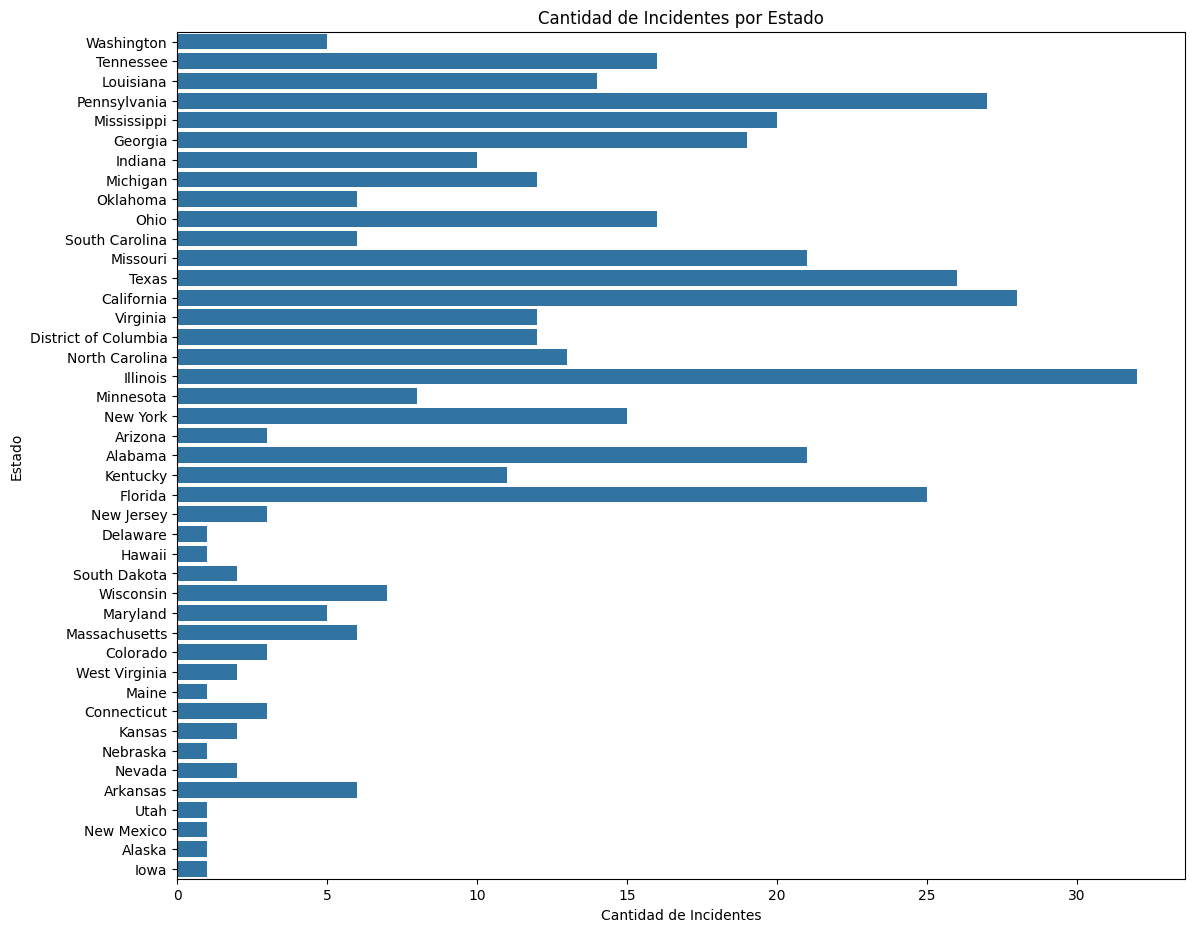

In [33]:
plt.figure(figsize=(13,11))
sns.countplot(data=df1, y=df1['Estado'])
plt.xlabel('Cantidad de Incidentes')
plt.ylabel('Estado')
plt.title('Cantidad de Incidentes por Estado')
plt.show()

## ¿Cual es el estado con más casos de incidentes con armas?

In [32]:
print(f'El estado con mas incidentes con armas en los estados unidos es {Estados_ataques.index[0]} con un total de {Estados_ataques.iloc[0]} incidentes')

El estado con mas incidentes con armas en los estados unidos es Illinois con un total de 32 incidentes


## ¿Del estado con mas incidentes, cual es la ciudad con mas incidentes?

In [ ]:
df1[df1['Estado']=='Minnesota'] 

,ID Incidente,Fecha del Incidente,Estado,Ciudad,Direccion,Victimas Asesinadas,Victimas Heridas,Sospechosos Asesinados,Sospechosos Heridos,Sospechosos Arrestados,Latitud,Longitud
24,3029992,"September 21, 2024",Minnesota,Minneapolis,10 S 5th St,2,3,0,0,0,44.97902,-93.26494
54,3010531,"August 30, 2024",Minnesota,Burnsville,12100 River Hills Dr,0,5,0,0,0,44.76634,-93.27615
72,2998510,"August 18, 2024",Minnesota,Minneapolis,1200 block of W Broadway Ave,0,4,0,0,0,44.97902,-93.26494
127,2969835,"July 15, 2024",Minnesota,Minneapolis,16th Ave S and E Franklin Ave,1,5,0,0,0,44.97902,-93.26494
239,2925929,"May 30, 2024",Minnesota,Minneapolis,2221 Blaisdell Ave,3,3,1,0,0,44.97902,-93.26494
252,2921097,"May 25, 2024",Minnesota,Saint Paul (North Saint Paul),2039 17th Ave E,0,4,0,0,0,44.99643,-93.01967
364,2839362,"February 27, 2024",Minnesota,Minneapolis,E Franklin Ave and Elliot Ave,1,3,0,0,0,44.97902,-93.26494
372,2832334,"February 18, 2024",Minnesota,Burnsville,12605 33rd Ave,3,1,1,0,0,44.76634,-93.27615
